In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector


conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Qasim2004',
    database='stock_news'
)

cursor = conn.cursor()

In [11]:
# Step 1: Updated SQL query using correct column name 'date'
query = """
SELECT ticker, date,
       price_change_pct_1h,
       price_change_pct_4h,
       price_change_pct_24h,
       price_change_pct_4d,
       price_change_pct_7d
FROM headlines
WHERE ticker IN ('BA', 'ADBE', 'META', 'COIN', 'GOOG')
ORDER BY ticker, date
"""

In [12]:
# Step 2: Execute query
cursor.execute(query)
rows = cursor.fetchall()

# Step 3: Load data
df = pd.DataFrame(rows, columns=[
    'ticker', 'date',
    'price_change_pct_1h', 'price_change_pct_4h', 'price_change_pct_24h',
    'price_change_pct_4d', 'price_change_pct_7d'
])

In [13]:
# Step 4: Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

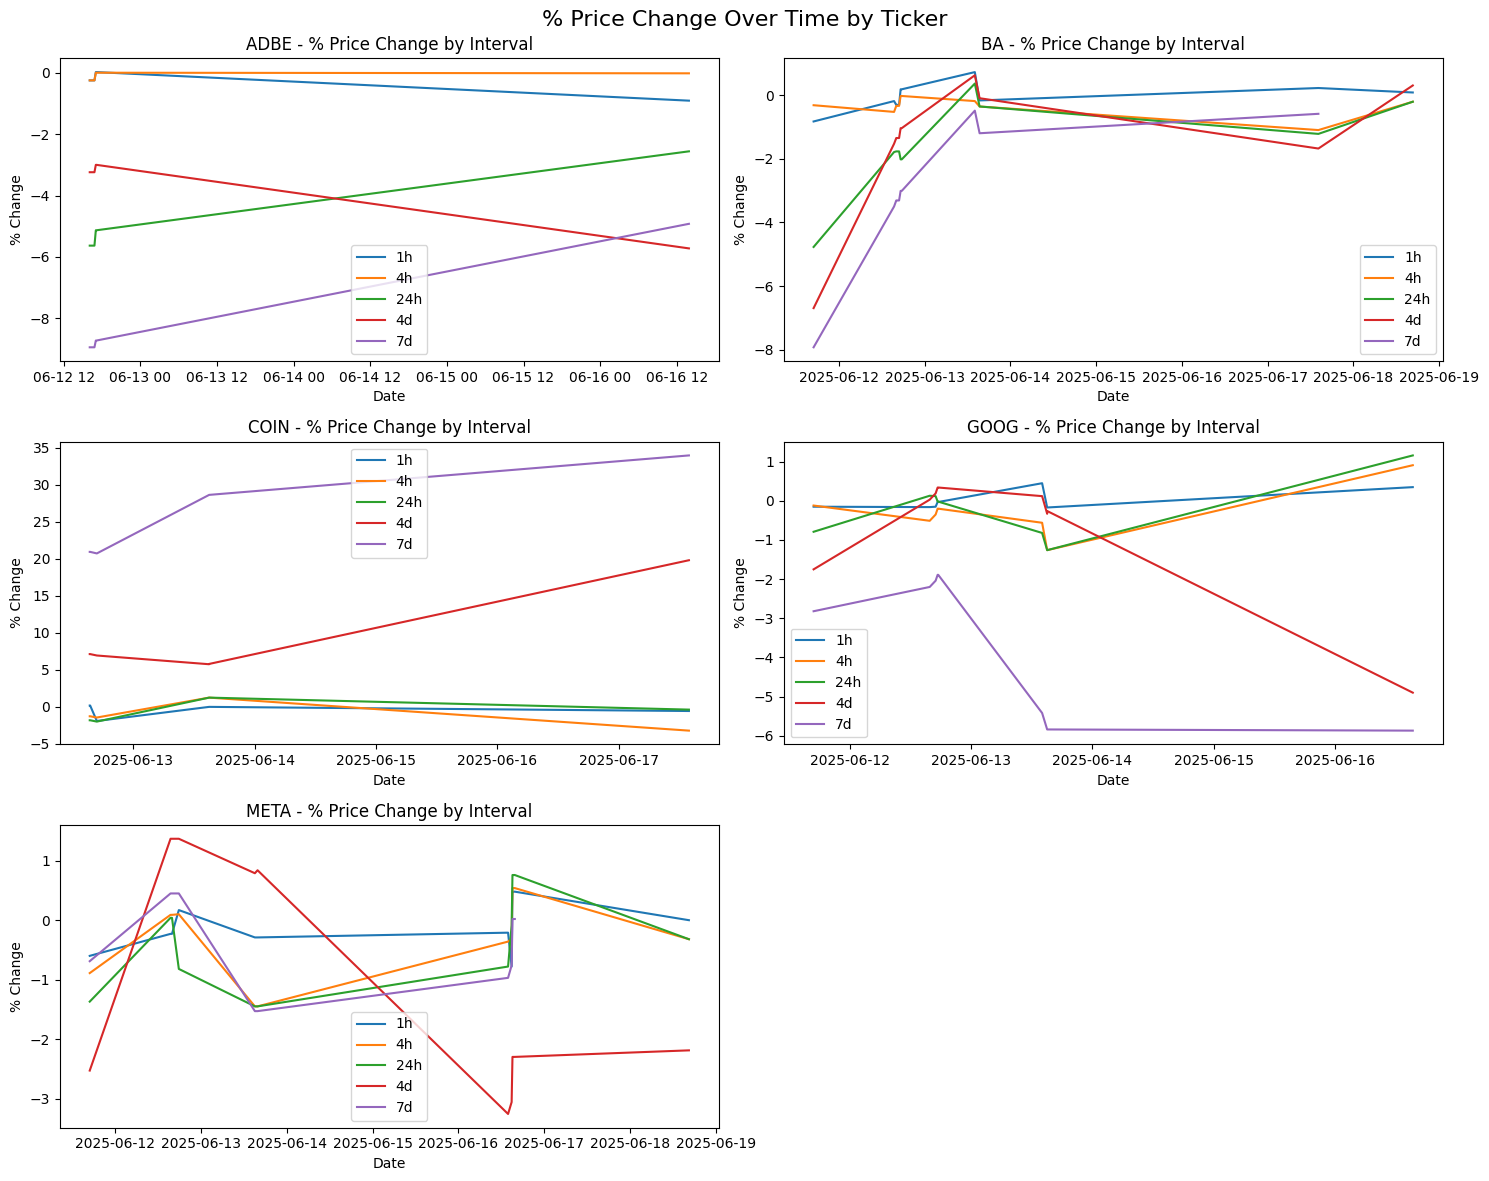

In [14]:
# Step 5: Plotting
tickers = df['ticker'].unique()
intervals = ['price_change_pct_1h', 'price_change_pct_4h', 'price_change_pct_24h',
             'price_change_pct_4d', 'price_change_pct_7d']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    ax = axes[i]
    ticker_df = df[df['ticker'] == ticker]
    for interval in intervals:
        ax.plot(ticker_df['date'], ticker_df[interval], label=interval.split('_')[-1])
    ax.set_title(f"{ticker} - % Price Change by Interval")
    ax.set_xlabel("Date")
    ax.set_ylabel("% Change")
    ax.legend()

# Hide unused subplot if needed
if len(tickers) < len(axes):
    for j in range(len(tickers), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle("% Price Change Over Time by Ticker", fontsize=16)
plt.tight_layout()
plt.show()


In [15]:
!pip3 install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [16]:
!pip3 install nbformat


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
# Import necessary libraries
import pandas as pd                   
import plotly.express as px           
import mysql.connector                

# Connecting to the MySQL database
conn = mysql.connector.connect(
    host="localhost",                 
    user="root",                      
    password="Qasim2004",             
    database="stock_news"             #
)


In [ ]:
# This gets stock headlines with matched sentiment and 24-hour price change
query = """
SELECT 
    ticker,                          -- Stock ticker (e.g., AAPL, TSLA)
    date,                            -- Timestamp of the headline
    headline,                        -- The actual news headline text
    matched_keywords,                -- Keywords from your sentiment dictionary that matched the headline
    sentiment_score,                 -- Final sentiment score from your scoring system
    price_change_pct_24h            -- % price change 24 hours after the news
FROM headlines
WHERE 
    ticker IN ('BA', 'ADBE', 'META', 'COIN', 'GOOG')  -- Only show these 5 tickers
    AND price_change_pct_24h IS NOT NULL              -- Make sure we have price data
    AND matched_keywords IS NOT NULL                 -- And matched keywords
    AND sentiment_score IS NOT NULL                  -- And sentiment score
ORDER BY date                                         -- Sort the results by time
"""

In [ ]:
df = pd.read_sql(query, conn)

conn.close()

# Convert the 'date' column to datetime format so it's easier for me to plot
df['date'] = pd.to_datetime(df['date'])

#Creating a detailed tooltip for each data point on the graph
# This shows the headline, keywords, sentiment score, and 24h price change

df['hover_text'] = (
    "Headline: " + df['headline'] +
    "<br>Keywords: " + df['matched_keywords'] +
    "<br>Sentiment Score: " + df['sentiment_score'].astype(str) +
    "<br>24h % Change: " + df['price_change_pct_24h'].astype(str) + "%"
)


/var/folders/8n/rfbb5wx545s1sgtlncggpk240000gn/T/ipykernel_95697/1724244837.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [ ]:
# Interactive line chart
# Each line represents a stock ticker over time
fig = px.line(
    df,
    x='date',
    y='price_change_pct_24h',
    color='ticker',
    hover_name='ticker',
    custom_data=['headline', 'matched_keywords', 'sentiment_score', 'price_change_pct_24h'],  # used in hover
    labels={'price_change_pct_24h': '24-Hour % Change'},
    title="24-Hour Stock Price Change with Matched Sentiment (Interactive)"
)

# Customizing hover box using custom_data
# %{} tags pull from 'custom_data' list in the same order
fig.update_traces(
    mode='markers+lines',
    hovertemplate=
        "Headline: %{customdata[0]}<br>" +
        "Keywords: %{customdata[1]}<br>" +
        "Sentiment Score: %{customdata[2]}<br>" +
        "24h % Change: %{customdata[3]}%"
)

# format layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='24-Hour % Change',
    legend_title='Ticker',
    height=600
)

fig.show()
